##Setup & Config

In [1]:
!pip install -q -U watermark

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.19.0

numpy       : 1.19.5
pandas      : 1.1.4
torch       : 1.8.0
transformers: 3.0.0



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='Paired', font_scale=1.2)

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 2021
np.random.seed(RANDOM_SEED)
from pandas import read_csv
import pandas as pd
import numpy as np
import spacy
from sklearn import svm
from sklearn import metrics
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

## Data loading and uniformization of target variable (majortopic)




In [384]:
demo = pd.read_csv("demo.csv")
repu = pd.read_csv("repu.csv")
platforms=pd.concat([demo,repu])

In [385]:
len(platforms.majortopic.value_counts())

28

In [386]:
platforms.loc[platforms.majortopic==-555, "majortopic"] = 0
demo.loc[demo.majortopic==-555, "majortopic"] = 0
repu.loc[repu.majortopic==-555, "majortopic"] = 0

In [387]:
platforms.drop(platforms.loc[platforms['majortopic']==28].index, inplace=True)
platforms.drop(platforms.loc[platforms['majortopic']==31].index, inplace=True)
platforms.drop(platforms.loc[platforms['majortopic']==24].index, inplace=True)
platforms.drop(platforms.loc[platforms['majortopic']==26].index, inplace=True)
platforms.drop(platforms.loc[platforms['majortopic']==27].index, inplace=True)

In [388]:
demo.drop(demo.loc[demo['majortopic']==28].index, inplace=True)
demo.drop(demo.loc[demo['majortopic']==31].index, inplace=True)
demo.drop(demo.loc[demo['majortopic']==24].index, inplace=True)
demo.drop(demo.loc[demo['majortopic']==26].index, inplace=True)
demo.drop(demo.loc[demo['majortopic']==27].index, inplace=True)

In [389]:
repu.drop(repu.loc[repu['majortopic']==28].index, inplace=True)
repu.drop(repu.loc[repu['majortopic']==31].index, inplace=True)
repu.drop(repu.loc[repu['majortopic']==24].index, inplace=True)
repu.drop(repu.loc[repu['majortopic']==26].index, inplace=True)
repu.drop(repu.loc[repu['majortopic']==27].index, inplace=True)

In [390]:
values=sorted(set(platforms.majortopic))
value_mapping = {}
for idx, value in enumerate(values):
    value_mapping[value] = idx
    
platforms["majortopic"] = np.array(list(map(lambda x: value_mapping[x], platforms["majortopic"])))
demo["majortopic"] = np.array(list(map(lambda x: value_mapping[x], demo["majortopic"])))
repu["majortopic"] = np.array(list(map(lambda x: value_mapping[x], repu["majortopic"])))

In [391]:
platforms.dropna(subset=['description', 'majortopic'],inplace=True)

In [392]:
class_names = ['No Policy Content', 'Macroeconomics', 'Civil Rights','Health','Agriculture',
               'Labour','Education','Environment','Energy','Immigration','Transportation','Law and Crime',
               'Social Welfare','Housing','Domestic Commerce','Defense','Technology','Foreign Trade',
               'International Affairs','Public Lands','Government Operations', 'Culture'
            ]


In [ ]:
**who many words per sentence?**

In [ ]:
total_words=0
statements=len(platforms.description)
for i in platforms.description:
    words=len(i.split())
    total_words+=words
avg=total_words/statements
print("Average number of words per statement: ",avg)

**Let's count the number and % we have per class**

In [393]:
total=platforms.count()[0]
num=[]
percentage=[]
for i in range(len(class_names)):
    a=platforms[platforms.majortopic==i].count()[0]
    num.append(a)
    percentage.append(round(a/total*100,1))
print(num)
print(percentage)

[1914, 3033, 2486, 2212, 982, 1248, 1888, 1096, 1126, 537, 647, 2339, 1559, 1193, 954, 3626, 653, 924, 5735, 1943, 1223, 93]
[5.1, 8.1, 6.6, 5.9, 2.6, 3.3, 5.0, 2.9, 3.0, 1.4, 1.7, 6.3, 4.2, 3.2, 2.6, 9.7, 1.7, 2.5, 15.3, 5.2, 3.3, 0.2]


In [394]:
counts=pd.DataFrame({"Major_Topic":class_names, "Count":num, "%_of_total":percentage})


In [395]:
sorted_counts=counts.sort_values("Count",ascending=False)

In [396]:
sorted_counts

,Major_Topic,Count,%_of_total
18,International Affairs,5735,15.3
15,Defense,3626,9.7
1,Macroeconomics,3033,8.1
2,Civil Rights,2486,6.6
11,Law and Crime,2339,6.3
3,Health,2212,5.9
19,Public Lands,1943,5.2
0,No Policy Content,1914,5.1
6,Education,1888,5.0
12,Social Welfare,1559,4.2


**Lets plot that in a graph**

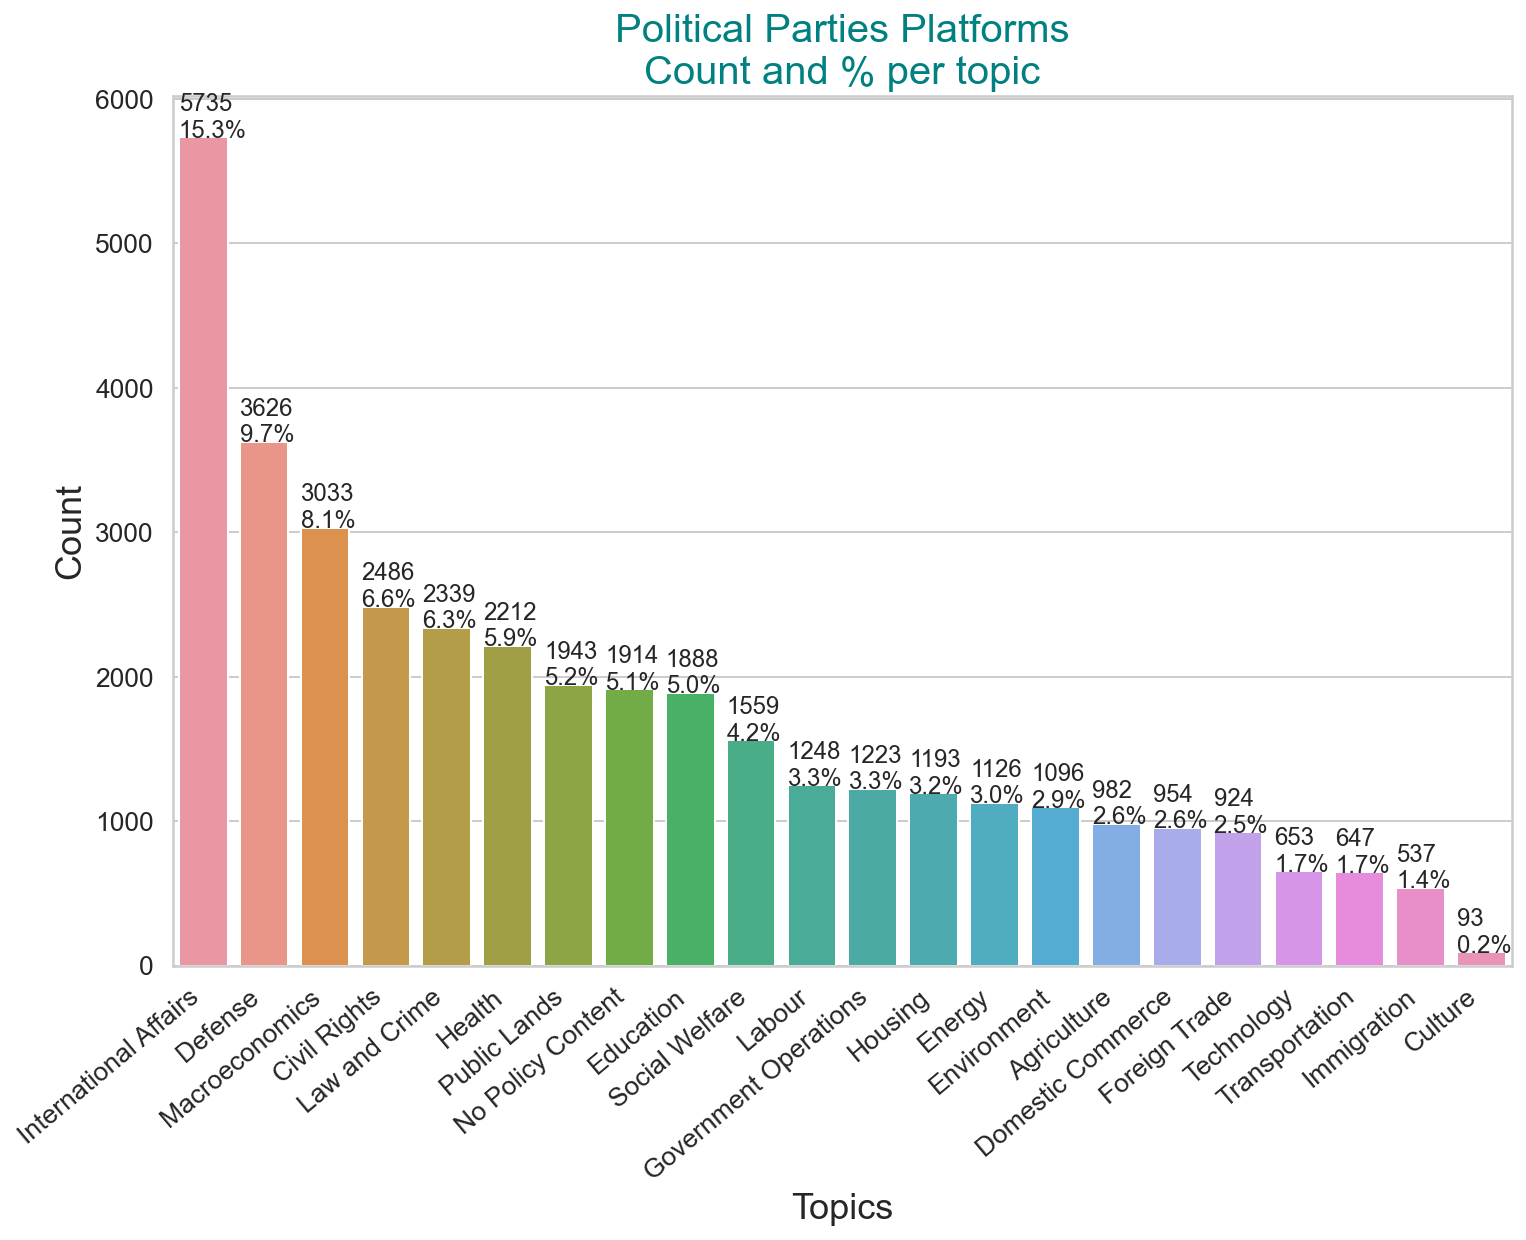

In [397]:
ax = sns.barplot(x="Major_Topic", y="Count", data=sorted_counts)
plt.xlabel('Topics',fontsize =18)
plt.ylabel('Count',fontsize =18)
for p in ax.patches:
    porcentage=p.get_height()/total*100
    txt = str(int(p.get_height()))+"\n" + str((porcentage).round(1)) + "%"
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt, fontsize=12)
plt.title('Political Parties Platforms\nCount and % per topic', fontsize =20,color="teal")
ax.set_xticklabels(sorted_counts.Major_Topic,rotation=40, ha='right');

**who many words per sentence?**

In [422]:

total_words=0
statements=len(platforms.description)
for i in platforms.description:
    words=len(i.split())
    total_words+=words
avg=total_words/statements
print("Average number of words per statement: ",avg)

Average number of words per statement:  21.337039908048435


## Some examples


In [399]:
demo[(demo.majortopic==1) & (demo.year==2020)].sample(10).description.values

array(['The economy is not working for the American people.',
       'Democrats believe more products in our homes, stores, workplaces, and communities should be stamped ""Made in America"" and will expand support for American manufacturing.',
       ' bolster economic growth and public health;',
       ' To ensure that federal funds are invested as effectively and efficiently as possible, the federal government should be using the best available evidence when making budget and spending decisions.',
       'BUILDING A STRONGER, FAIRER ECONOMY',
       ' Our program of reform will provide immediate, marked relief for working families, including more generous, refundable tax credits to benefit low- and middle-income families, and easier and more equitable access to tax provisions that help working families build wealth, including by equalizing tax benefits for retirement contributions and providing more accessible tax breaks for homeownership.',
       'The scars of the financial crisis 

In [400]:
demo[(demo.majortopic==6) & (demo.year==2020)].sample(10).description.values

array([' And we will protect veterans and servicemembers from being steered into low-performing for-profit higher education and professional programs.',
       ' Democrats will prioritize equitable education and access for students with disabilities, English language learners, low-income students, students of color, and urban and rural students, including those who are homeless, are immigrants or refugees, or are in the foster care or juvenile justice systems.',
       ' Democrats will work to end the use of such high-stakes tests and encourage states to develop reliable, continuous, evidence-based approaches to student assessment that rely on multiple and holistic measures that better represent student achievement.',
       'PROVIDING A WORLD-CLASS EDUCATION IN EVERY ZIP CODE',
       ' Democrats also support aggressive enforcement of the Americans with Disabilities Act in schools and other settings.',
       "Democrats also support raising early childhood standards and providing ongo

In [401]:
demo[(demo.majortopic==9) & (demo.year==2020)].sample(10).description.values

array([' We will demand that leaders of our immigration agencies be Senate-confirmed professionals, and that Immigration and Customs Enforcement and Customs and Border Protection personnel abide by our values and professional, evidence-based standards and are held accountable for any inappropriate, unlawful, or inhumane treatment.',
       ' Our family, humanitarian, and diversity pathways have contributed immeasurably to the vibrancy and productivity of American society and should continue to be the centerpiece of our immigration system .',
       'Even as we work to reverse the enormous damage caused by the Trump Administration, we are determined to build a 21st century immigration system that embodies our values, expands economic opportunity for all Americans, and enhances our global competitiveness.',
       "The truth is that our immigration system was broken long before President Trump came into office, and his departure alone won't fix it.",
       " reaffirm America's commitmen

In [382]:
demo[(demo.majortopic==18) & (demo.year==2020)].sample(10).description.values

array([' We will end policies that incentivize offshoring, and instead accelerate onshoring of critical supply chains, including in medical supplies and pharmaceuticals.',
       'Democrats will take aggressive action against China or any other country that tries to undercut American manufacturing by manipulating their currencies and maintaining a misaligned exchange rate with the dollar, dumping products like steel and aluminum in our markets, or providing unfair subsidies.',
       'Democrats will pursue this strategy without resorting to self-defeating, unilateral tariff wars or falling into the trap of a new Cold War.',
       'For too long, the global trading system has failed to keep its promises to American workers.',
       'We will not negotiate any new trade deals before first investing in American competitiveness at home.',
       'Democrats will fight for every American job and will make sure American workers have a fair shot in the global economy.',
       'Global Economy 

In [406]:
demo[(demo.majortopic==15) & (demo.year==2020)].sample(10).description.values

array([' Democrats will lower regional-and global-threats by reinforcing nuclear arms control.',
       ' Our war in Afghanistan is the longest war in American history, with the youngest U.S. troops now fighting a war that was launched before they were even born.',
       " It's time to root out domestic terrorism in all its forms.",
       " The Trump Administration's proposal to build new nuclear weapons is unnecessary, wasteful, and indefensible.",
       ' And we will mobilize our partners to make sustained investments that can prevent conflict and help extinguish the flames on which extremists feed.',
       'Terrorism',
       'Turning the page on two decades of large-scale military deployments and open-ended wars in the Middle East does not mean the United States will abandon a region where we and our partners still have enduring interests.',
       'Democrats recognize that the threat landscape has evolved dramatically since September 11.',
       "Democrats believe America's a

In [379]:
demo[(demo.majortopic==0) & (demo.year==2020)].sample(10).description.values

array([' We will lead not just with the example of our power, but with the power of our example.',
       'Democrats believe in bringing the American people together, not stoking division and distrust.',
       ' The difference in values between the two parties on this life-or-death issue could not be more stark.',
       ' To turn this crisis into a crucible, from which we will forge a stronger, brighter, and more equitable future.',
       'Democrats believe that we can only be strong in the world when we are strong and united at home.',
       'Democrats will work to secure a better future for younger generations.',
       'President Trump promised he would put ""America First""-but Trump\'s America stands alone.',
       " Under his leadership, America's reputation and influence are in tatters.",
       ' Over the past four years, the Trump Administration has done precisely the opposite.',
       'As Democrats, we say with one voice: no more.'], dtype=object)

## Preprocessing


In [15]:
import nltk
nltk.download('stopwords')



def preprocess(df):
  #remove all numbers and symbols
  df['description'] = df['description'].astype('str').apply(lambda x: re.sub('[^A-Za-z]', ' ', x)) 
  #lowercase
  df['description']=df['description'].str.lower()
  #remove stopwords
  stop = stopwords.words('english')
   
  df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
  #Porter stemming
  #porter = PorterStemmer()
  #df['description'] = df['description'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))
  return df

[nltk_data] Downloading package stopwords to C:\Users\Guillermo
[nltk_data]     Fremd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
preprocess(platforms)

,year,id,pap_majortopic,pap_subtopic,majortopic,subtopic,description,filter_democrat,words
0,1976,4961,2,202,2,202,fully recognize religious ethical nature conce...,1.0,20.0
1,1980,5920,2,202,2,202,reproductive rights fully recognize religious ...,1.0,15.0
2,1980,5921,2,202,2,202,also recognize belief many americans woman rig...,1.0,23.0
3,1980,5922,2,202,2,202,democratic party supports supreme court decisi...,1.0,29.0
4,1992,9334,2,202,2,202,provide full range reproductive choice educati...,1.0,20.0
...,...,...,...,...,...,...,...,...,...
19831,2016,19832,19,1925,18,1925,internet firewall circumvention anti censorshi...,NaN,37.0
19832,2016,19833,19,1925,18,1925,leaders authoritarian governments argue govern...,NaN,23.0
19833,2016,19834,19,1925,18,1925,focus internet freedom cost effective means pe...,NaN,19.0
19834,2016,19835,18,1803,17,1803,also important economic interest censorship co...,NaN,27.0


## Let's see what are the most common words per Topic



In [17]:
from collections import Counter
most_common=platforms.groupby("majortopic")["description"].apply(lambda x: Counter(" ".join(x).split()).most_common(10))



In [18]:
for i in range(len(most_common)):
    print ("Major Topic: ",class_names[i])
    print ([word[0] for word in most_common[i]])

Major Topic:  No Policy Content
['people', 'america', 'party', 'american', 'government', 'new', 'nation', 'americans', 'democratic', 'world']
Major Topic:  Macroeconomics
['tax', 'economic', 'economy', 'american', 'growth', 'government', 'federal', 'taxes', 'spending', 'jobs']
Major Topic:  Civil Rights
['rights', 'women', 'equal', 'discrimination', 'government', 'support', 'right', 'federal', 'americans', 'must']
Major Topic:  Health
['health', 'care', 'medical', 'americans', 'insurance', 'research', 'support', 'medicare', 'must', 'access']
Major Topic:  Agriculture
['farm', 'farmers', 'agriculture', 'agricultural', 'food', 'american', 'programs', 'family', 'income', 'products']
Major Topic:  Labour
['workers', 'labor', 'jobs', 'work', 'right', 'act', 'job', 'training', 'must', 'wage']
Major Topic:  Education
['education', 'schools', 'students', 'school', 'children', 'federal', 'support', 'teachers', 'public', 'programs']
Major Topic:  Environment
['environmental', 'climate', 'water',

## Let's see trends in the data



In [92]:

def to_percentage_per_year(df):
    percent_df=pd.DataFrame(columns=np.sort(df.year.unique()), index=np.sort(df.majortopic.unique()))
    
    for year in np.sort(df.year.unique()):
        total=df[df.year==year].count()
        for topic in np.sort(df.majortopic.unique()):
            porcentage=df[(df.year==year) & (df.majortopic==topic)].count()[0]/total[0]
            percent_df.loc[int(topic),int(year)]=float("{:.2f}".format(porcentage*100))
    
    return percent_df


In [114]:
demo_trends=to_percentage_per_year(demo)
repu_trends=to_percentage_per_year(repu)
plat_trends=to_percentage_per_year(platforms)

In [110]:
repu_trends.head()

,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,11.03,5.34,6.69,10.86,18.08,8.4,7.26,2.79,5.2,6.44,3.66,4.1,11.57,3.54,4.98,2.45,4.86,2.01
1,9.66,8.9,6.09,7.93,6.58,3.89,7.69,6.89,11.92,9.02,8.85,11.85,8.76,6.09,6.33,8.3,8.15,5.17
2,11.72,10.68,5.88,12.53,4.66,3.89,8.82,7.09,5.13,8.61,3.3,3.2,4.38,4.66,3.3,7.26,8.44,9.97
3,2.07,2.49,1.42,3.13,0.82,2.46,4.32,2.69,2.83,2.92,4.45,5.57,5.46,11,9.96,10.94,9.3,7.84
4,4.83,8.19,9.94,4.8,4.11,5.33,2.51,2.79,3.03,5.97,3.82,2.5,2.37,2.42,0.49,1.13,1.65,2.25


In [111]:
demo_trends.head()

,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
0,7.25,2.65,5.94,2.61,3.9,8.61,3.27,3.56,2.06,2.61,3.76,14.15,4.16,8.4,6.48,5.91,6.65,4.86,3.53
1,8.29,10.85,7.85,10.07,9.57,8.48,8.38,13.22,6.64,15.31,6.02,10.73,5.82,6.98,5.47,5.04,10.91,4.44,2.99
2,7.77,6.08,4.02,6.41,6.86,4.71,9.05,5.56,8.48,6.26,5.26,5.12,3.8,4.69,4.36,6.61,6.3,9.97,13.88
3,2.07,2.65,1.92,4.18,5.2,2.83,4.02,3.78,4.07,1.86,9.02,5.37,5.46,5.75,9.27,7.13,6.83,10.23,12.02
4,6.74,8.47,6.32,4.05,2.96,3.5,4.94,3.56,2.46,1.45,2.26,1.95,0.59,0.71,0.11,0.52,1.24,0.25,0.9


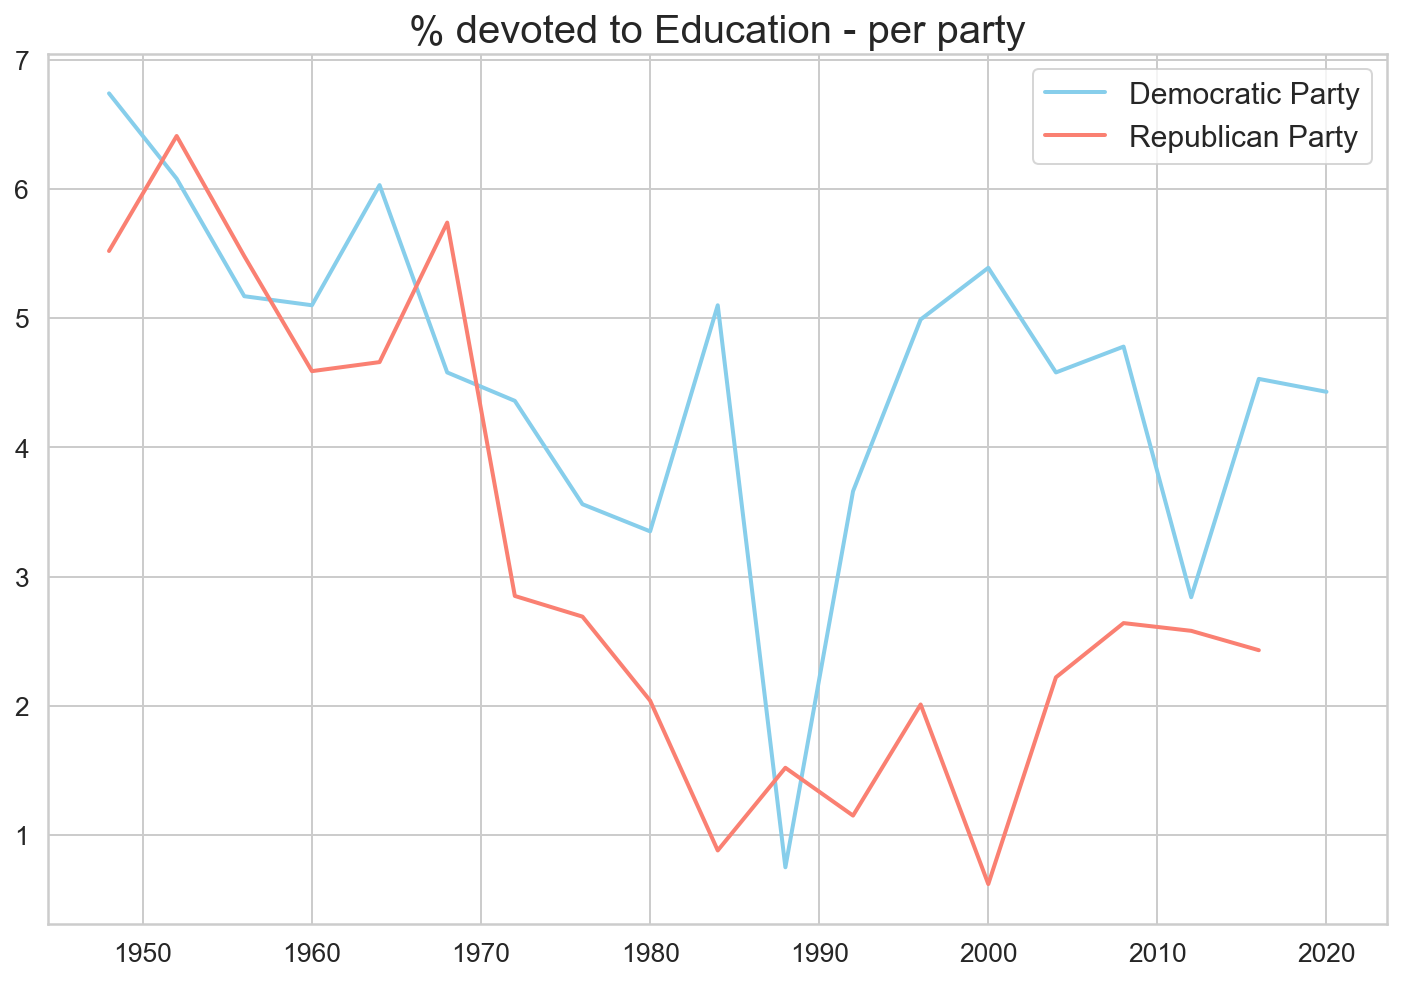

In [192]:
plt.plot( demo_trends.columns, demo_trends.iloc[5], marker='', color='skyblue', linewidth=2,  label="Democratic Party")
plt.plot( repu_trends.columns, repu_trends.iloc[5], marker='', color='salmon', linewidth=2,  label="Republican Party")

#plt.plot( demo_trends.index, demo_trends.index, data=demo_trends, marker='', color='olive', linewidth=2, linestyle='dashed', label="coco")
plt.title("% devoted to Education - per party", fontsize=20)
# show legend
plt.legend(fontsize=15)

# show graph
plt.show()

In [57]:
demo_trends.loc[0]

1948    11.03
1952     5.34
1956     6.69
1960    10.86
1964    18.08
1968     8.40
1972     7.26
1976     2.79
1980     5.20
1984     6.44
1988     3.66
1992     4.10
1996    11.57
2000     3.54
2004     4.98
2008     2.45
2012     4.86
2016     2.01
Name: 0, dtype: object

**average number of words**

In [416]:
len(platforms.description.iloc[1].split())

15